In [ ]:
from tkinter import *
import pandas as pd
from matplotlib import pyplot as plt
from tkinter import ttk
import tkinter.messagebox
from datetime import datetime
import display_excel
import todo_home

# -------------------------------------------------------------------------------

def home():  
    for item in fCent.winfo_children():
        item.destroy()
    
    l3 = Label(fCent, text="Task", font="Helvetica 20 bold",fg="grey", bg="black", padx=60)
    l3.pack(side=TOP, anchor='center', fill='x')
    
    todo_home.home_module(fCent)

# -------------------------------------------------------------------------------
def all_task():
    for item in fCent.winfo_children():
        item.destroy()
    
    l3 = Label(fCent, text="Task", font="Helvetica 20 bold",fg="grey", bg="black", padx=60)
    l3.pack(side=TOP, anchor='center', fill='x')
    
    display_excel.all_saved_task(fCent)
# -------------------------------------------------------------------------------
def monitor():
    for item in fCent.winfo_children():
        item.destroy()
    
    l3 = Label(fCent, text="Task", font="Helvetica 20 bold",fg="grey", bg="black", padx=60)
    l3.pack(side=TOP, anchor='center', fill='x')
    
    def task_status():
        # Read CSV into pandas
        data = pd.read_excel("TASK1.xlsx")
        df = pd.DataFrame(data)

        x = df['Task']
        y = df['Task Status']

        # Figure Size
        fig = plt.figure(figsize =(10, 5))

        # Horizontal Bar Plot
        plt.plot(y, x, linestyle='solid', linewidth='6')

        font_1={'family':'serif', 'color':'red', 'size':20}
        font_2={'family':'serif', 'color':'blue', 'size':16}

        plt.xlabel("Task Complition Status",fontdict=font_2)
        plt.ylabel("Task Title", fontdict=font_2)
        plt.title("Task Complition Graph", fontdict=font_1)
        plt.grid()

        fig.savefig("graph.png")
        # Show Plot
        plt.show()
        
    def date_task():
        # Read CSV into pandas
        data = pd.read_excel("TASK12.xlsx")
        df = pd.DataFrame(data)

        x = df['Date']
        y = df['Task']

        # Figure Size
        fig = plt.figure(figsize =(10, 5))

        # Horizontal Bar Plot
        plt.barh(x[0:10], y[0:10])

        font_1={'family':'serif', 'color':'red', 'size':20}
        font_2={'family':'serif', 'color':'blue', 'size':16}

        plt.xlabel("Number of Task",fontdict=font_2)
        plt.ylabel("Dates of Different Task", fontdict=font_2)
        plt.title("Number of Task in a Perticular Date", fontdict=font_1)

        fig.savefig("graph.png")
        # Show Plot
        plt.show()

    
    graph_button_frame = Frame(fCent, bg="grey")
    graph_button_frame.pack()
    
    task_status_button = Button(graph_button_frame, fg="black", 
                                text="Task And Status", font="Helvetica 14 bold",command=task_status)
    task_status_button.grid(row=0, column=1, pady=20, padx=20)
    date_task_button = Button(graph_button_frame, fg="black", 
                              text="Date And Task", font="Helvetica 14 bold",command=date_task)
    date_task_button.grid(row=0, column=2, pady=20, padx=20)
    
# ----------------------------------------------------------------------------------
def about():
    for item in fCent.winfo_children():
        item.destroy()
    
    l3 = Label(fCent, text="Task", font="Helvetica 20 bold",fg="grey", bg="black", padx=60)
    l3.pack(side=TOP, anchor='center', fill='x')
    
    def hide_about():
        about_frame.pack_forget()
    
    about_frame = Frame(fLeft, bg="grey")
    about_frame.pack(fill="y")
    
    person1 = Label(about_frame, text="This Software is Devloped by: ",
                    font="Helvetica 12 bold underline",fg="black",bg="grey")
    person1.grid(row=0,column=0, pady=10)
    
    person1 = Label(about_frame, text='''**Nikhil Verma(12113868)**
    Development:
    -Created Home Page
    -Provided User Interface''',
                    font="Helvetica 14 bold",fg="cyan",bg="black")
    person1.grid(row=1,column=0, pady=10)
    
    person1 = Label(about_frame, text='''**Shivam Shakya(12100142)**
    Development:
    -Created All Task
    -Provided Visualization''',
                    font="Helvetica 14 bold",fg="cyan",bg="black")
    person1.grid(row=2,column=0, pady=10)
    
    hide_button = Button(about_frame, fg="black", text="Hide About", width=20, font="Helvetica 14 bold",command=hide_about)
    hide_button.grid(row=3,column=0, pady=10)
    
#-------------------------------------------------------------------------------
def time():
    now = datetime.now()
    timer = now.strftime("%X\n")
    dates = now.strftime("%d/%m/%Y")
    l4.config(text=timer + dates)
    l4.after(1000,time)
    
    timer = now.strftime("%X")
    dates = now.strftime("%d/%m/%Y")
    
    df=pd.read_excel("TASK1.xlsx")
    df["DateTime"] = df['Time'] +"-"+ df["Date"]
    if (df['DateTime'].eq(timer+"-"+dates)).any():
        tkinter.messagebox.showwarning(title="Alarm",message="Time To Work")
    
#------------------------------------------------------------------------------
window = Tk()
window.title("TO-DO List")
window.geometry("1360x768")

fLeft = Frame(window,borderwidth=6, bg="grey", relief=SUNKEN)
fLeft.pack(side=LEFT, fill="y")

fRight = Frame(window,borderwidth=6, bg="grey", relief=SUNKEN)
fRight.pack(side=RIGHT, fill="y")

fCent = Frame(window,borderwidth=4, bg="grey", relief=SUNKEN)
fCent.pack(side=TOP,fill="both")


l1 = Label(fLeft, text="Options", font="Helvetica 20 bold",fg="grey", bg="black", padx=80)
l1.pack(side=TOP, anchor='center')
l2 = Label(fRight, text="Date & Time", font="Helvetica 20 bold",fg="grey", bg="black", padx=60)
l2.pack(side=TOP, anchor='center')
l3 = Label(fCent, text="Task", font="Helvetica 20 bold",fg="grey", bg="black", padx=60)
l3.pack(side=TOP, anchor='center', fill='x')

l4 = Label(fRight, font=("caveat 20 bold"),bd=1, background="black",foreground="cyan", padx=20, pady=10)
l4.pack(anchor="center", pady=10)
time()

b1 = Button(fLeft, fg="black", text="Home", font="Helvetica 14 bold",command=home)
b1.pack(pady=10, padx=25, fill="x")
b2 = Button(fLeft, fg="black", text="All Task", font="Helvetica 14 bold",command=all_task)
b2.pack(pady=10, padx=25, fill="x")
b3 = Button(fLeft, fg="black", text="Task Monitoring", font="Helvetica 14 bold",command=monitor)
b3.pack(pady=10, padx=25, fill="x")
b4 = Button(fLeft, fg="black", text="About", font="Helvetica 14 bold",command=about)
b4.pack(pady=10, padx=25, fill="x")


mainloop()

In [116]:
dF=pd.read_excel("TASK1.xlsx")
dF

Task      Time        Date  Task Status
0        Interview Meeting  20:00:00  28/10/2022            1
1      meeting with Nikhil  21:00:00  28/10/2022            1
2     Work Related to Bank  10:10:00  31/10/2022            1
3   Flight Delhi to Mumbai  21:00:00  31/10/2022            0
4    Go For football Match  17:00:00   1/11/2022            1
5  Anmol Will come to home  22:00:00  02/11/2022            1
6    Friend Marriage Party  18:00:00  03/11/2022            0
7          College Classes  10:00:00  03/11/2022            1
8              House work   19:00:00  29/10/2022            0
9      Aman Birthday party  20:00:00  30/10/2022            0

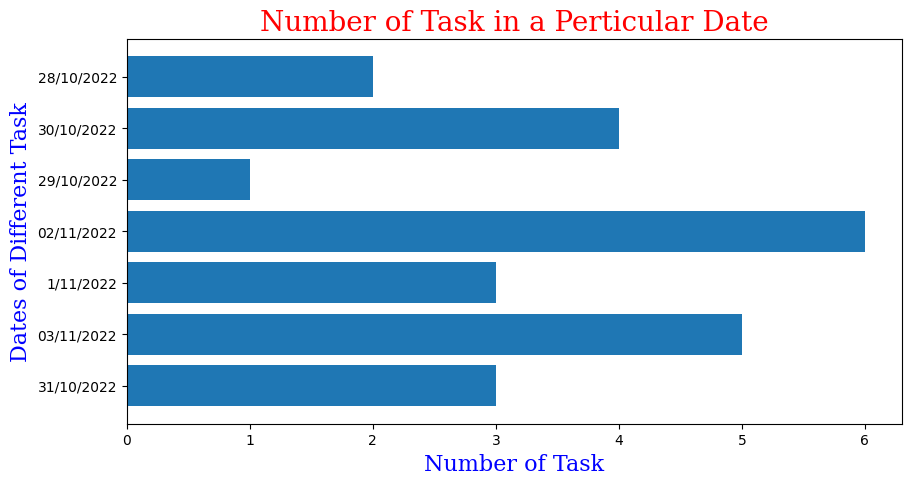

In [117]:
import pandas as pd
from matplotlib import pyplot as plt

# Read CSV into pandas
data = pd.read_excel("TASK12.xlsx")
df = pd.DataFrame(data)

x = df['Date']
y = df['Task']

# Figure Size
fig = plt.figure(figsize =(10, 5))

# Horizontal Bar Plot
plt.barh(x[0:10], y[0:10])

font_1={'family':'serif', 'color':'red', 'size':20}
font_2={'family':'serif', 'color':'blue', 'size':16}

plt.xlabel("Number of Task",fontdict=font_2)
plt.ylabel("Dates of Different Task", fontdict=font_2)
plt.title("Number of Task in a Perticular Date", fontdict=font_1)

fig.savefig("date_task.png")
# Show Plot
plt.show()


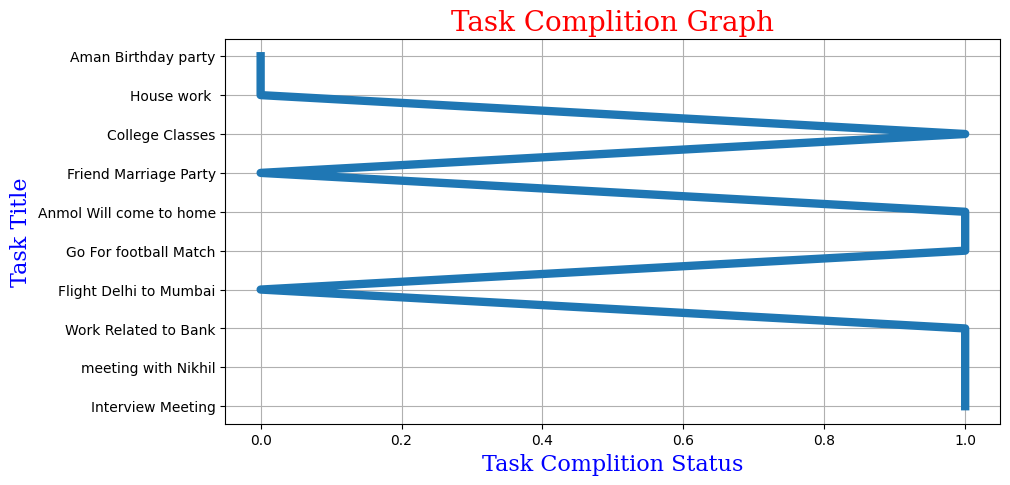

In [118]:
import pandas as pd
from matplotlib import pyplot as plt

# Read CSV into pandas
data = pd.read_excel("TASK1.xlsx")
df = pd.DataFrame(data)

x = df['Task']
y = df['Task Status']

# Figure Size
fig = plt.figure(figsize =(10, 5))

# Horizontal Bar Plot
plt.plot(y, x, linestyle='solid', linewidth='6')

font_1={'family':'serif', 'color':'red', 'size':20}
font_2={'family':'serif', 'color':'blue', 'size':16}

plt.xlabel("Task Complition Status",fontdict=font_2)
plt.ylabel("Task Title", fontdict=font_2)
plt.title("Task Complition Graph", fontdict=font_1)
plt.grid()

fig.savefig("task_satus.png")
# Show Plot
plt.show()


In [6]:
# df=pd.read_excel("TASK1.xlsx")
# df["DateTime"] = df['Time'] +"-"+ df["Date"]
# check = (df['DateTime'].eq('20:00:00-28/10/2022')).any()
# print(df)

                      Task      Time        Date  Task Status  \
0        Interview Meeting  20:00:00  28/10/2022            1   
1      meeting with Nikhil  21:00:00  28/10/2022            1   
2     Work Related to Bank  10:10:00  31/10/2022            1   
3   Flight Delhi to Mumbai  21:00:00  31/10/2022            0   
4    Go For football Match  17:00:00  01/11/2022            1   
5  Anmol Will come to home  22:00:00  02/11/2022            1   
6    Friend Marriage Party  18:00:00  03/11/2022            0   
7          College Classes  10:00:00  03/11/2022            1   
8              House work   19:00:00  29/10/2022            0   
9      Aman Birthday party  20:00:00  30/10/2022            0   

               DateTime  
0  20:00:00\n28/10/2022  
1  21:00:00\n28/10/2022  
2  10:10:00\n31/10/2022  
3  21:00:00\n31/10/2022  
4  17:00:00\n01/11/2022  
5  22:00:00\n02/11/2022  
6  18:00:00\n03/11/2022  
7  10:00:00\n03/11/2022  
8  19:00:00\n29/10/2022  
9  20:00:00\n30/10/2022 